# Sydney Part Time Data Science Course
## Week 9 - Artificial Neural Networks Lab




## Part 1
## Bernoulli Restricted Boltzmann Machine (RBM) in python

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html

In [1]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline


# new dataset, handwritten digits!
digits = datasets.load_digits()

%matplotlib inline


In [2]:

digits.data


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:

len(digits.data)      # 1,797 observations


1797

In [4]:

len(digits.data[0])   # 8 x 8 pixel image


64

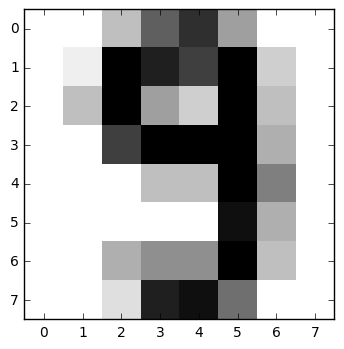

In [5]:

plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
# the number 9


In [6]:

digits.target
len(digits.target)

digits.target[-5]
# 9


9

In [9]:
digits_X, digits_y = digits.data, digits.target


#### use an unsupervized artifical neural network to ascertain features

In [10]:

rbm = BernoulliRBM(random_state=0)
logistic = linear_model.LogisticRegression()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
# I use a pipeline to do two things at once. Use the neural network to find features
# and use a logistic regression to classify


In [11]:


cross_val_score(classifier, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OOF! Not so great...


# Ok but what if we just use logistic regression without getting new features?
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OK not bad!!!



0.92101881133607011

## Part 2
## Using Amazon AWS instance with Tensorflow installed


Rather than install Tensorflow and other deep learning libraries locally, we will be using a prepared AWS image. This image has the required software already installed. You will use this image as the basis for creating your own EC2 computing instances that you will perform your neiral network computations in. 

Why this way? Because it is easy to run into complications when installing this software and we do not have time to resolve all the issues. Also, this way you can launch a large machine to process the data more quickly and not leave your own laptop hung up. 

#### Setup the new Deep Learning AMI from Amazon

Go to AMI page https://aws.amazon.com/marketplace/pp/B01M0AXXQB?qid=1480547242791&sr=0-4&ref_=srh_res_product_title#product-description
This AMI is already set up with a bunch of useful Deep Learning packages, including Tensorflow. It also has python and anaconda installed. As of its latest release it is preconfigured to use the GPU saving considerable effort in configuring that ourselves. 

Press continue:
![](./images/AWS1.png)

---

Use the Manual launch as many of you will not have created some of the settings it expects. Select the region. Since the data we will be processing and the software we are accessing most likely resides in the US it makes sense to have the computing instance there too. Also, the pricing will be cheaper than using the Sydney region.
![](./images/AWS2.png)

---

We will be launching a GPU instance. There multiple instance configurations even for GPUs. We will choose a cost effective one that is intended for machine learning: p2.xlarge
The link below describes this instance type:
https://aws.amazon.com/ec2/instance-types/p2/
It has a large amount of RAM (61GB), 4 virtual CPUs and 1 GPU. 
Here is the pricing per hour for the instance:
![](./images/AWS3.png)

---

Choose the instance type and then select “configure instance details".
![](./images/AWS4.png)

---

Use the following default configuration settings and then select “Add Storage”
![](./images/AWS5.png)

---




There is a root storage provisioned for your compute instance, and you can also add extra storage if you would like to segregate some data. 
![](./images/AWS6.png)

---


Give the instance a tag such as name, and give the tag a value. Then select “Configure Security Group"
![](./images/AWS7.png)

---


We need to set some restrictions on networking so that our instance isn’t totally exposed to unsavoury types on the internet. The instance won’t be long lived though and we won’t have sensitive data on there, so it isn’t a huge issue. We will accept any IP address because anything else is too much of a hassle for now, but we will specify specific ports to allow incoming traffic on. Choose “Create a new security group”, then add rules to match what is shown below. The custom TCP rules are there to allow communication on the standard ports for Jupyter (8888) and TensorBoard (6006).

![](./images/AWS8.png)

---


Select “Launch” from the summary screen:
![](./images/AWS9.png)

---


Before we can start the instance we need to specify a “Key Pair”. This is a pairing of public and private key that we will use to authenticate our computer to the instance. When the instate is started by AWS it is configured both with the software from the base AMI we have chosen as well as additional configuration from AWS to allow us to connect initially and use any other standard AWS services. One of these configurations is the public key. When we connect to the instance using the SSH protocol we will authenticate ourselves with the matching private key. This key is called private because we keep it to ourselves and don’t share it. 

Download the key file (it ends with .pem) and store it in a sensible location that we will refer to when connecting. 
![](./images/AWS10.png)

---

Once it is downloaded, Launch the instance:
![](./images/AWS11.png)

---

Follow the link to “View Instance” - which takes you to the EC2 management console for the region we launched it in. You will see the instance initialising:
![](./images/AWS12.png)

---

When the instance is running and has a green light, you will be able to connect. Press “Connect”
![](./images/AWS13.png)

---



Follow the instructions to SSH into the instance using the settings conveniently provided by AWS. If you are using a Mac, you can SSH using Terminal. On a Windows machine, you may be able to use the Bash client you have been using for Git, but if that doesn’t work you should install PuTTY and use it to connect to the instance.

For Step 2, use cd in the Bash shell to change to the directory that you stored the key file in. 

Note that step 3 is required to give the right permissions to the key file. 

For step 5, instead of root@ec2…. use ec2-user@ec2….
example:
ssh -i "GPU_Deep_Learning_KP.pem" ec2-user@ec2-35-164-121-62.us-west-2.compute.amazonaws.com
![](./images/AWS14.png)

---



Once connected you should see something like the following screen. From here you can use unix commands to navigate the instance, change files, download components and launch applications. This instance uses Amazon Linux: https://aws.amazon.com/premiumsupport/knowledge-center/linux-directory-commands/
![](./images/AWS15.png)

---

## Launch Ipython from the SSH terminal

type: ipython

This will allow you to use python from the terminal Bash shell. Alternatively we could launch a jupyter notebook server from this instance and use jupyter. This takes a little more setup, but would be a good idea if we were using plots in the lab. 

## Follow the instructions for the Tensflow lab
https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html

Make sure you select the version of the lab to match the version of Tensorflow installed on the instance: r0.10

![](./images/tf1.png)

---

#### How did the accuracy score compare to our local Bernoulli Restricted Boltzmann Machine (RBM) in python?

# Finally, Stop or Terminate your GPU instance!

Otherwise you will be charged for every hour it is still running and also for the storage. If you stop the instance you will only be charged for the storage allocated to the instance, which is a fraction of the running costs. See this link for storage pricing details:
https://aws.amazon.com/ebs/pricing/

Alternatively you can terminate the instance to avoid all charges. Do this if you don't plan to use the instance again or don't mind going through the setup again. 

From the EC2 console, select Action > Stop (or Terminate)

![](./images/AWSstop.png)